# Analysis of dataset Facebook-known-pairs_data_2013

### Imports

In [3]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import csv

[1, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 33, 34, 34, 36, 38, 43, 44, 44, 49]
{1: 0.5290322580645161, 883: 0.4650793650793651, 132: 0.47354497354497355, 339: 0.8484848484848485, 653: 0.42328042328042326, 545: 0.4774193548387097, 171: 0.5133333333333333, 117: 0.7719298245614035, 196: 0.6956521739130435, 587: 0.6739130434782609, 372: 0.5181159420289855, 147: 0.6373626373626373, 55: 0.46881720430107526, 859: 0.8181818181818182, 106: 0.3266384778012685, 504: 0.5904761904761905, 471: 0.

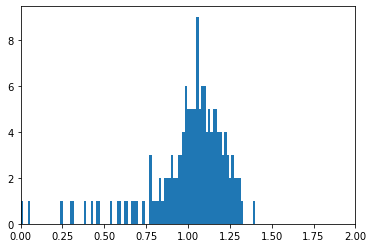

In [36]:
with open('data/Facebook-known-pairs_data_2013.csv', 'r') as f:
    contact = csv.reader(f, delimiter=' ')
    
    G = nx.Graph()
    actors = []
    for line in contact:
        if int(line[0]) not in actors:
            actors.append(int(line[0]))
            G.add_node(int(line[0]))
        if(int(line[2]) == 1):
            G.add_edge(int(line[0]), int(line[1]))
    print(sorted(d for n, d in G.degree()))
    print(nx.clustering(G))
    print(G.number_of_nodes())
    print(G.number_of_edges())
    print(G.size())

    rep_deg = nx.degree_histogram(G)
    print(rep_deg)
    #plt.hist(rep_deg)
    print(nx.density(G))
    print(nx.info(G))

    N, K = G.order(), G.size()
    avg_deg = float(K) / N
    print("Nodes: ", N)
    print("Edges: ", K)
    print("Average Degree: ", avg_deg)

    clust_coefficients = nx.clustering(G)
    avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
    print(avg_clust)

    print(nx.average_clustering(G))
    print('==========================')

    bet_cen = nx.betweenness_centrality(G)
    clo_cen = nx.closeness_centrality(G)
    eig_cen = nx.eigenvector_centrality(G)
    print(bet_cen)
    print(clo_cen)
    print(eig_cen)

    L = nx.normalized_laplacian_matrix(G)
    e = np.linalg.eigvals(L.A)
    print("Largst eigenvalue:", max(e))
    print("Smallest eigenvalue:", min(e))
    plt.hist(e, bins=100)
    plt.xlim(0,2)

plt.show()

In [4]:
fb = pd.read_csv("data/Facebook-known-pairs_data_2013.csv", sep=' ' , names=['i', 'j', 'friend'])
fb['friend'] = fb['friend'].astype('bool')
fb.head()

,i,j,friend
0,1,984,False
1,1,883,True
2,1,941,False
3,1,650,False
4,1,132,True


In [5]:
print(len(set(fb['i'])))

150


It means there are 150 people in the dataset.

In [6]:
print(len(set(fb['j'])))

153


In [7]:
print(fb)

         i     j  friend
0        1   984   False
1        1   883    True
2        1   941   False
3        1   650   False
4        1   132    True
...    ...   ...     ...
4510  1543  1594    True
4511  1543  1784    True
4512  1594  1828    True
4513  1594  1784    True
4514  1594  1870    True

[4515 rows x 3 columns]


In [8]:
iss = list(set(fb['i']))
iss.sort()
print(iss)

[1, 3, 9, 14, 20, 34, 38, 55, 62, 63, 65, 70, 80, 85, 101, 106, 111, 116, 117, 119, 122, 124, 125, 132, 145, 147, 149, 151, 156, 159, 170, 171, 179, 181, 184, 190, 194, 196, 201, 202, 205, 213, 214, 219, 232, 240, 245, 246, 265, 272, 274, 275, 280, 290, 325, 335, 339, 343, 346, 353, 364, 372, 376, 387, 425, 428, 429, 440, 441, 447, 448, 452, 454, 466, 471, 477, 487, 488, 491, 494, 496, 502, 504, 513, 520, 525, 544, 545, 564, 576, 577, 582, 587, 601, 605, 615, 621, 624, 634, 638, 640, 642, 649, 650, 653, 687, 691, 694, 725, 753, 763, 769, 777, 779, 797, 826, 836, 841, 857, 859, 866, 869, 871, 883, 884, 908, 923, 939, 941, 945, 959, 977, 991, 1067, 1201, 1212, 1214, 1218, 1228, 1232, 1237, 1238, 1260, 1332, 1336, 1339, 1401, 1423, 1543, 1594]


In [9]:
for i in iss:
    print(i, 'has', len(fb[fb['i'] == i]['j'].values), 'friends.')

1 has 88 friends.
3 has 48 friends.
9 has 57 friends.
14 has 28 friends.
20 has 41 friends.
34 has 59 friends.
38 has 28 friends.
55 has 74 friends.
62 has 43 friends.
63 has 50 friends.
65 has 62 friends.
70 has 55 friends.
80 has 25 friends.
85 has 45 friends.
101 has 112 friends.
106 has 116 friends.
111 has 27 friends.
116 has 25 friends.
117 has 77 friends.
119 has 69 friends.
122 has 20 friends.
124 has 45 friends.
125 has 34 friends.
132 has 52 friends.
145 has 47 friends.
147 has 39 friends.
149 has 78 friends.
151 has 57 friends.
156 has 40 friends.
159 has 47 friends.
170 has 67 friends.
171 has 49 friends.
179 has 17 friends.
181 has 52 friends.
184 has 43 friends.
190 has 45 friends.
194 has 22 friends.
196 has 65 friends.
201 has 76 friends.
202 has 60 friends.
205 has 55 friends.
213 has 31 friends.
214 has 30 friends.
219 has 22 friends.
232 has 37 friends.
240 has 42 friends.
245 has 26 friends.
246 has 22 friends.
265 has 55 friends.
272 has 62 friends.
274 has 51 frie

In [10]:
jss = list(set(fb['j']))
jss.sort()
print(jss)
for j in jss:
    print(j, 'has', len(fb[fb['j'] == j]['i'].values), 'friends.')

[3, 9, 34, 38, 55, 62, 63, 65, 70, 80, 85, 101, 106, 111, 116, 117, 119, 122, 124, 125, 132, 145, 147, 149, 151, 156, 159, 170, 171, 179, 181, 184, 190, 194, 196, 201, 202, 205, 213, 214, 219, 232, 240, 245, 246, 265, 272, 274, 275, 280, 290, 325, 335, 339, 343, 346, 353, 364, 372, 376, 387, 425, 428, 429, 440, 441, 447, 448, 452, 454, 466, 471, 477, 487, 488, 491, 494, 496, 502, 504, 513, 520, 525, 544, 545, 564, 576, 577, 582, 587, 601, 605, 615, 621, 624, 634, 638, 640, 642, 649, 650, 653, 687, 691, 694, 725, 753, 763, 769, 777, 779, 797, 826, 836, 841, 857, 859, 866, 869, 871, 883, 884, 908, 923, 939, 941, 945, 954, 959, 970, 977, 984, 991, 1067, 1201, 1212, 1214, 1218, 1228, 1232, 1237, 1238, 1260, 1332, 1336, 1339, 1401, 1423, 1543, 1594, 1784, 1828, 1870]
3 has 1 friends.
9 has 2 friends.
34 has 1 friends.
38 has 2 friends.
55 has 3 friends.
62 has 2 friends.
63 has 3 friends.
65 has 3 friends.
70 has 5 friends.
80 has 2 friends.
85 has 4 friends.
101 has 11 friends.
106 has 14 

### Check if there are not any doublons

In [11]:
unique_values = []
unique_values.extend(list(set(fb['i'])))
unique_values.extend(list(set(fb['j'])))
unique_values.sort()
final_unique = list(set(unique_values))
final_unique.sort()
print(final_unique)
print(len(final_unique))

[1, 3, 9, 14, 20, 34, 38, 55, 62, 63, 65, 70, 80, 85, 101, 106, 111, 116, 117, 119, 122, 124, 125, 132, 145, 147, 149, 151, 156, 159, 170, 171, 179, 181, 184, 190, 194, 196, 201, 202, 205, 213, 214, 219, 232, 240, 245, 246, 265, 272, 274, 275, 280, 290, 325, 335, 339, 343, 346, 353, 364, 372, 376, 387, 425, 428, 429, 440, 441, 447, 448, 452, 454, 466, 471, 477, 487, 488, 491, 494, 496, 502, 504, 513, 520, 525, 544, 545, 564, 576, 577, 582, 587, 601, 605, 615, 621, 624, 634, 638, 640, 642, 649, 650, 653, 687, 691, 694, 725, 753, 763, 769, 777, 779, 797, 826, 836, 841, 857, 859, 866, 869, 871, 883, 884, 908, 923, 939, 941, 945, 954, 959, 970, 977, 984, 991, 1067, 1201, 1212, 1214, 1218, 1228, 1232, 1237, 1238, 1260, 1332, 1336, 1339, 1401, 1423, 1543, 1594, 1784, 1828, 1870]
156


In [12]:
total_couple = 0
friends_count = []
for value in final_unique:
    friends_i = len(fb[fb['i'] == value]['i'].values)
    friends_j = len(fb[fb['j'] == value]['j'].values)
    friends_count.append(friends_i + friends_j)
    total_couple += (friends_i + friends_j)
    print(value, 'has', (friends_i + friends_j), 'friends.')
print(friends_count)
print("The one with the most friends is", final_unique[friends_count.index(max(friends_count))], "with", max(friends_count), "friends.")
print("The one with the least friends is", final_unique[friends_count.index(min(friends_count))], "with", min(friends_count), "friends.")
print("The average number of friends is", np.mean(friends_count))
print(total_couple)

1 has 88 friends.
3 has 49 friends.
9 has 59 friends.
14 has 28 friends.
20 has 41 friends.
34 has 60 friends.
38 has 30 friends.
55 has 77 friends.
62 has 45 friends.
63 has 53 friends.
65 has 65 friends.
70 has 60 friends.
80 has 27 friends.
85 has 49 friends.
101 has 123 friends.
106 has 130 friends.
111 has 30 friends.
116 has 26 friends.
117 has 90 friends.
119 has 82 friends.
122 has 25 friends.
124 has 55 friends.
125 has 36 friends.
132 has 66 friends.
145 has 60 friends.
147 has 49 friends.
149 has 91 friends.
151 has 64 friends.
156 has 46 friends.
159 has 54 friends.
170 has 86 friends.
171 has 64 friends.
179 has 25 friends.
181 has 65 friends.
184 has 60 friends.
190 has 59 friends.
194 has 26 friends.
196 has 90 friends.
201 has 96 friends.
202 has 86 friends.
205 has 81 friends.
213 has 49 friends.
214 has 49 friends.
219 has 28 friends.
232 has 47 friends.
240 has 64 friends.
245 has 29 friends.
246 has 30 friends.
265 has 88 friends.
272 has 95 friends.
274 has 73 frie

In [37]:
def spectralBi (G, n1):
    L = nx.laplacian_matrix (G).asfptype().todense ()
    nodes = list(G.nodes ().keys())
    n = len (nodes)
    
    lamb, vect = np.linalg.eig (L)
    ind = np.argmin (lamb)
    lamb[ind] = 100000
    ind = np.argmin (lamb)
    
    
    v2 = vect[:, ind]
    vals = []
    for i in range (len (v2)):
        vals.append ((v2[i], i))
    vals.sort ()
    
    
    p1 = {}
    p2 = {}
    for i in range (n1):
        p1[nodes[vals[i][1]]] = 1
        p2[nodes[vals[n - i - 1][1]]] = 1
    for i in range (n1, n):
        p1[nodes[vals[i][1]]] = 0
        p2[nodes[vals[n - i - 1][1]]] = 0
        
    if R (G, p1) < R (G, p2):
        return p1
    else:
        return p2
    
        
def R (G, p):
    r = 0
    for n1 in G.nodes ():
        for n2 in G.nodes ():
            if p[n1] != p[n2] and G.has_edge (n1, n2):
                r += 1 # for weighted graphs, should be incremented by weight
    return r

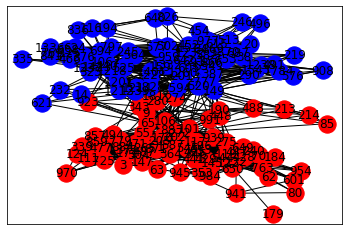

In [38]:
res = spectralBi(G, 78)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, [n for n in G.nodes() if res[n] == 1], node_color='r')
nx.draw_networkx_nodes(G, pos, [n for n in G.nodes() if res[n] != 1], node_color='b')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

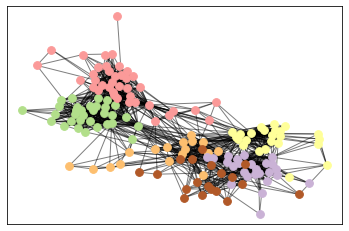

In [44]:
import community
import matplotlib as mpl

def partition_and_draw (G):
    pos = nx.spring_layout(G)
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    count = 0.
    cm = plt.cm.ScalarMappable(cmap = plt.get_cmap('Paired'), norm = mpl.colors.Normalize(vmin = 0, vmax = size, clip = False))
    print ("number of communities: ", int(size), " modularity: ", community.modularity (partition, G))
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        print(com, " : ", list_nodes)
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 60, node_color = cm.to_rgba (count))


    nx.draw_networkx_edges(G,pos, alpha=0.5)
    plt.show()
    
partition_and_draw(G)

In [40]:
def modularity (G, p):
    q = 0.0
    degs = dict(nx.degree (G))
    m2 = 1.0 * sum (degs.values ())
    for n1 in G.nodes ():
        for n2 in G.nodes ():
            if p[n1] == p[n2]:
                if G.has_edge (n1, n2):
                    q += 1 # for weighted graphs, should be incremented by weight
                q -= degs[n1] * degs[n2] / m2
    q /= m2
    return q

print(modularity(G, res))

0.4442875413626099
